In [1]:
import pandas as pd
import numpy as np

In [12]:
results = pd.read_csv('rots.txt')

In [13]:
error = np.zeros(100)
frequency = np.zeros(100)
for index, row in results.iterrows():
        error[int(row['point'])] += row['abs_rel_error']
        frequency[int(row['point'])] += 1

In [17]:
results[:30]

,point,x,y,z,abs_rel_error
0,0,0.141067,-0.99,0.000000,0.069990
1,15,-0.093017,-0.69,-0.717808,0.249883
2,15,-0.093017,-0.69,-0.717808,0.218137
3,24,0.427662,-0.51,0.746328,0.155996
4,92,0.333552,0.85,0.407729,0.133510
5,58,0.558866,0.17,0.811646,0.155076
6,32,0.158663,-0.35,0.923215,0.343983
7,66,0.236156,0.33,0.913964,0.252591
8,96,-0.179623,0.93,-0.320680,0.098664
9,74,-0.084680,0.49,0.867600,0.296166


In [2]:
from PanoProcessing.rotate_pano import synthesizeRotation

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [4]:
pano = mpimg.imread('/home/paulo/datasets/3d60/Matteport3D/92_fa5f164b48f043c6b2b0bb9e8631a4821_color_0_Left_Down_0.0.png')

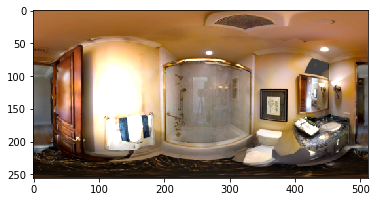

In [22]:
plt.imshow(pano)

In [43]:
r = R.from_rotvec([0,0,np.deg2rad(180)])

In [44]:
r.as_euler('zyx', degrees=True)

array([-180.,    0.,    0.])

In [37]:
rot_pano = synthesizeRotation(pano, r.as_matrix())

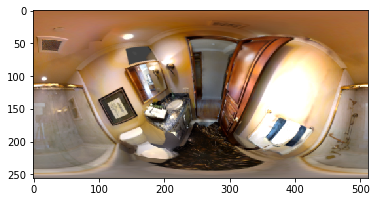

In [38]:
plt.imshow(rot_pano)

In [39]:
unrot_pano = synthesizeRotation(rot_pano, r.inv().as_matrix())

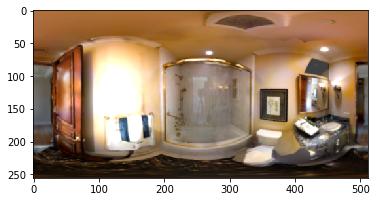

In [40]:
plt.imshow(unrot_pano)

In [69]:
r_euler = R.from_euler('zyx', [90,0,0], degrees=True)

In [70]:
r_euler1 = R.from_euler('zyx', [0,90,0], degrees=True)

In [71]:
rot_pano_part1 = synthesizeRotation(pano, r_euler.as_matrix())
rot_pano_part2 = synthesizeRotation(rot_pano_part1, r_euler1.as_matrix())

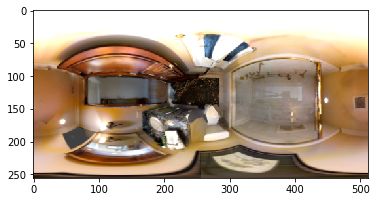

In [72]:
plt.imshow(rot_pano_part2)

In [73]:
rot_pano_part3 = synthesizeRotation(pano, r_euler1.as_matrix())
rot_pano_part4 = synthesizeRotation(rot_pano_part3, r_euler.as_matrix())

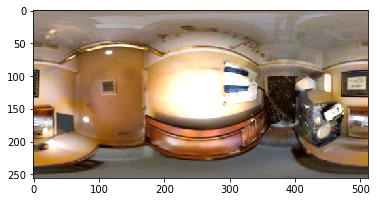

In [74]:
plt.imshow(rot_pano_part4)

In [65]:
r = R.from_euler('zyx', [90,90,0], degrees=True)

In [66]:
rot_pano = synthesizeRotation(pano, r.as_matrix())

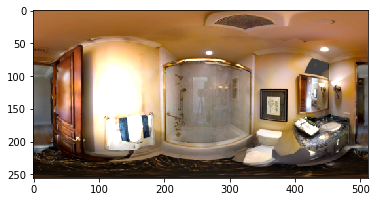

In [68]:
plt.imshow(pano)

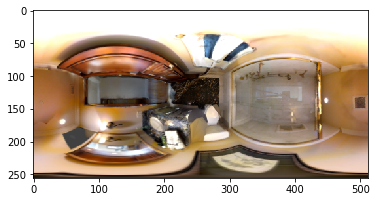

In [67]:
plt.imshow(rot_pano)

In [75]:
de_r = R.from_euler('zyx', [-90,-90,0], degrees=True)

In [76]:
unrot_pano = synthesizeRotation(rot_pano, de_r.as_matrix())

In [17]:
plt.imshow(unrot_pano)

NameError: name 'unrot_pano' is not defined

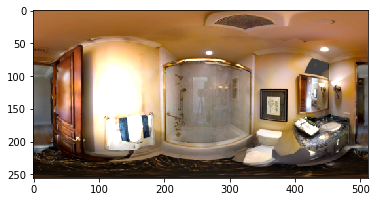

In [35]:
plt.imshow(pano)

In [36]:
rx, ry = np.random.uniform(-60, 60,2)
random_r = R.from_euler('zyx', [0, ry, rx], degrees=True)

In [37]:
inputs = synthesizeRotation(pano, random_r.as_matrix())

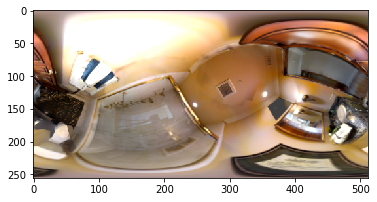

In [38]:
plt.imshow(inputs)

In [39]:
rot = np.random.uniform(-60, 60,2)

In [40]:
correction_r = R.from_euler('zyx', [0,rot[1],rot[0]])

In [41]:
inputs = synthesizeRotation(inputs, correction_r.inv().as_matrix())

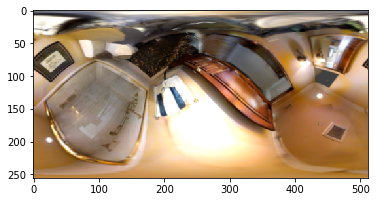

In [42]:
plt.imshow(inputs)

In [43]:
output = inputs

In [44]:
output = synthesizeRotation(output, correction_r.as_matrix())

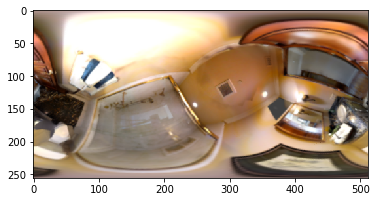

In [45]:
plt.imshow(output)

In [46]:
output = synthesizeRotation(output, random_r.inv().as_matrix())

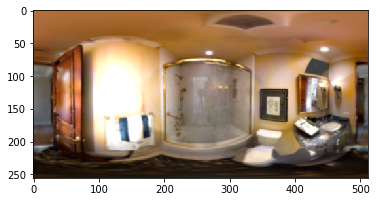

In [47]:
plt.imshow(output)